#Source detection
- PhotUtils tests
- Identifications

In [1]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
from marcas_salida import exporta_reg
from astropy.stats import mad_std
from photutils import aperture_photometry, CircularAperture
from photutils import DAOStarFinder, IRAFStarFinder

In [2]:
def nombre_sin_ext(ruta_fichero):
    '''
    Return filename without extension and his route.
    '''
    sinext = (ruta_fichero.split('/'))[-1].split('.')[-2]
    conext = (ruta_fichero.split('/'))[-1]
    return (sinext, conext)

### Filelist (all GEOMED .fits file)
List files

In [3]:
ruta1 = '../VGISS_FITS/'
rutas1 = os.listdir(ruta1)
rutasFITS = []
for ruta in rutas1:
    directorio = ruta1 + ruta + '/'
    #Total file list:
    archivos = os.listdir(directorio)
    #Agregar solo los GEOMED:
    for archivo in archivos:
        if 'GEOMED' in archivo and '.fits' in archivo:
            rutasFITS.append(directorio + archivo)

In [5]:
len(rutasFITS)

9835

### Note
Feel free to try any file on the list (45 as example)

In [6]:
fits_file = fits.open(rutasFITS[45])

In [7]:
data = fits_file[0].data

### Image

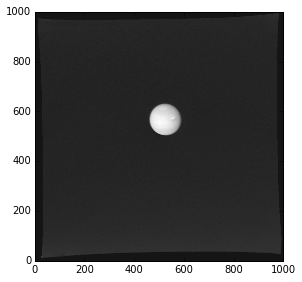

In [8]:
plt.imshow(data, origin='lower', cmap='gray')
plt.tight_layout()
plt.show()

### Histogram

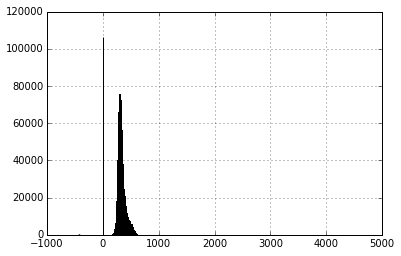

In [9]:
NBINS = 500
plt.hist(data.flat, NBINS)
#plt.xlim((-200, 6000))
plt.grid(True)

### Detection

In [10]:
data2 = data - np.median(data)

In [11]:
bkg_sigma = mad_std(data2)
bkg_sigma

57.821486521718477

### Important part!
On this part we'll set the detection method (use DAO or IRAF)

Docs of [DAO](http://photutils.readthedocs.io/en/stable/api/photutils.detection.DAOStarFinder.html#photutils.detection.DAOStarFinder) and [IRAF](http://photutils.readthedocs.io/en/stable/api/photutils.detection.IRAFStarFinder.html#photutils.detection.IRAFStarFinder)

In [12]:
Starfind = DAOStarFinder(fwhm=3.0, threshold=5.*bkg_sigma)
# Starfind = IRAFStarFinder(fwhm=3.0, threshold=5.*bkg_sigma)
sources = Starfind(data2)
print('Found ', str(len(sources)), 'elements')

Found  7 elements


### Radii

In [13]:
positions = (sources['xcentroid'], sources['ycentroid'])    
apertures = CircularAperture(positions, r=3.)    
phot_table = aperture_photometry(data, apertures)    
print(phot_table)

 id      xcenter            ycenter        aperture_sum
           pix                pix                      
--- ------------------ ------------------ -------------
  1 26.788460396503446 16.935143588505053 23229.3808362
  2  29.05672298737725  23.56192500095352 18422.4449699
  3  984.4953190178455               26.0 5862.24016503
  4 31.138859804385774   52.6487676156642  14513.717719
  5 475.79728273176033  526.1600199266337 81064.6222207
  6 474.20461586944447  532.1151507865632 102871.096103
  7 27.043827604017903  710.3063288809757 8439.75128812


### Show

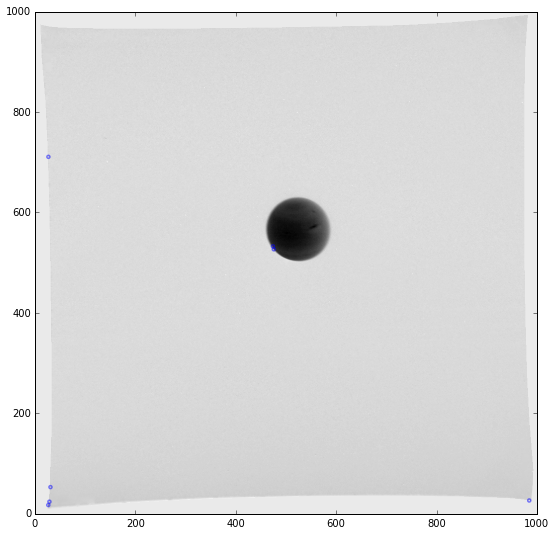

In [14]:
plt.figure(figsize=(9,9))
plt.imshow(data, cmap='gray_r', origin='lower')
apertures.plot(color='blue', lw=1.5, alpha=0.5)

### Save reg file

In [15]:
aguardar = exporta_reg('test.reg')
contador = 0
for punto in phot_table:
    contador = contador + 1
    xcord = punto['xcenter'].value + 1.0
    ycord = punto['ycenter'].value + 1.0
    aguardar.agrega_circulo(xcenter = xcord, ycenter = ycord, radius=5, texto='S' + str(contador))
aguardar.escribe_reg()

The reg file can be opened by DS9 program.
Open the file .fits and then load the region file test.reg in Neptupy folder on "Regions" menu and "Load Regions" option (in DS9 interface)